# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
!pip install pandas==0.23

    100% |████████████████████████████████| 11.7MB 3.3MB/s eta 0:00:01
pyspark 2.4.0 requires py4j==0.10.7, which is not installed.
  Found existing installation: pandas 0.20.3
    Uninstalling pandas-0.20.3:
      Successfully uninstalled pandas-0.20.3
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
pd.__version__

'0.20.3'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [5]:
movies = pd.read_csv('titles.csv.bz2', compression='bz2')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
title    244914 non-null object
year     244914 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [6]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [7]:
cast = pd.read_csv('cast.csv.bz2', compression='bz2')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
title        object
year         int64
name         object
type         object
character    object
n            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [8]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [9]:
release_dates = pd.read_csv('release_dates.csv.bz2', compression='bz2', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
title      479488 non-null object
year       479488 non-null int64
country    479488 non-null object
date       479488 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [10]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [11]:
len(movies)

244914

### List all Batman movies ever made

In [12]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [13]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [14]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [15]:
harrypotter_df = movies[movies.title.str.contains('Harry Potter',case=False)]
print('Harry Potter Movies from th most recent to the earliest :')
harrypotter_df.sort_values(by=['year'], ascending=False)

#harrypotter_df.head()

Harry Potter Movies from th most recent to the earliest :


,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [16]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [17]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [18]:
len(movies[(movies.year >= 2000) & (movies.year <=2018)])

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [19]:
len(movies[movies.title == 'Hamlet'])

20

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [20]:
hamlet_df = movies[(movies.title == 'Hamlet')& (movies.year>=2000)]
print('All movies title "Hamlet" on or after the year 2000 :')
hamlet_df.sort_values(by=['year'], ascending=False)
#len(hamlet_df)


All movies title "Hamlet" on or after the year 2000 :


,title,year
244747,Hamlet,2017
191940,Hamlet,2016
186137,Hamlet,2015
178290,Hamlet,2014
227953,Hamlet,2011
1931,Hamlet,2009
55639,Hamlet,2000


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [21]:
cast.head(20)
supportingcast_inception_df = cast[(cast.title == 'Inception') & (pd.isnull(cast['n']))]
supportingcast_inception_df
print('Total number of roles in the movie "Inception" are of the supporting cast are : ')
len(supportingcast_inception_df)

Total number of roles in the movie "Inception" are of the supporting cast are : 


27

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [22]:
maincast_inception_df = cast[(cast.title == 'Inception') & (pd.notnull(cast['n']))]
maincast_inception_df
print('Total number of roles in the movie "Inception" are of the main cast  : ')
len(maincast_inception_df)

Total number of roles in the movie "Inception" are of the main cast  : 


51

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- support cast always have an 'n' value
- remember to sort!

In [23]:
topcast_Inception=maincast_inception_df.sort_values(by=['n'], ascending = False)
toptencast_Inception = topcast_Inception['name']
toptencast_Inception.head(10)

3731263        Shannon Welles
833376            Jack Gilroy
2250605         Jason Tendell
3473041    Lisa (II) Reynolds
1812091        Andrew Pleavin
2049179           Felix Scott
807795         Michael Gaston
149008           Peter Basham
3444628        Nicole Pulliam
3203564     Alex (II) Lombard
Name: name, dtype: object

### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [24]:
cast_albusD = cast[cast.character.str.contains('Albus Dumbledore',case = False) ]
cast_albusD

,title,year,name,type,character,n
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792419,Harry Potter and the Deathly Hallows: Part 1,2010,Michael Gambon,actor,Professor Albus Dumbledore,39.0
792420,Harry Potter and the Deathly Hallows: Part 2,2011,Michael Gambon,actor,Professor Albus Dumbledore,2.0
792421,Harry Potter and the Goblet of Fire,2005,Michael Gambon,actor,Albus Dumbledore,37.0
792422,Harry Potter and the Half-Blood Prince,2009,Michael Gambon,actor,Professor Albus Dumbledore,2.0
792423,Harry Potter and the Order of the Phoenix,2007,Michael Gambon,actor,Albus Dumbledore,36.0
792424,Harry Potter and the Prisoner of Azkaban,2004,Michael Gambon,actor,Albus Dumbledore,27.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
947790,Harry Potter and the Sorcerer's Stone,2001,Richard Harris,actor,Albus Dumbledore,1.0
1685537,Ultimate Hero Project,2013,George (X) O'Connor,actor,Albus Dumbledore,NaN


In [25]:
cast_albusD = cast[cast.character.str.contains('Albus Dumbledore',case = False) ]
cast_albusDname = cast_albusD['name']
cast_albusDname1 = []
for name in cast_albusDname:
    if name not in cast_albusDname1:
        cast_albusDname1.append(name)
print('Actors who played the character "Albus Dumbledore" are : ',cast_albusDname1)   

Actors who played the character "Albus Dumbledore" are :  ['Dane Farwell', 'Michael Gambon', 'Richard Harris', "George (X) O'Connor", 'Toby Regbo', 'Timothy Tedmanson']


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [26]:
cast_kr = cast[cast.name.str.contains('Keanu Reeves', case = False)]
cast_kr1 = cast_kr['character']
cast_kr_uniq = []
for characters in cast_kr1:
    if characters not in cast_kr_uniq:
        cast_kr_uniq.append(characters)
cast_kr_uniq
print('Total roles "Keanu Reeves" played throughout his career are :',len(cast_kr_uniq))

Total roles "Keanu Reeves" played throughout his career are : 56


In [27]:
cast_kr_nan = cast_kr[(cast_kr.year>=1999) & (pd.notnull(cast_kr['n']))]
print('Leading roles that "Keanu Reeves" played on or after 1999 in order by year : ')
cast_kr_nan_order = cast_kr_nan.sort_values(by=['year'], ascending = True)
cast_kr_nan_order

Leading roles that "Keanu Reeves" played on or after 1999 in order by year : 


,title,year,name,type,character,n
1892370,Me and Will,1999,Keanu Reeves,actor,Himself,42.0
1892369,Me and Will,1999,Keanu Reeves,actor,Dogstar,42.0
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892398,The Watcher,2000,Keanu Reeves,actor,Griffin,3.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892387,The Gift,2000,Keanu Reeves,actor,Donnie Barksdale,3.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892379,Something's Gotta Give,2003,Keanu Reeves,actor,Julian Mercer,3.0
1892391,The Matrix Reloaded,2003,Keanu Reeves,actor,Neo,59.0


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [28]:
(cast[cast.year.between(1950,1960)][['type','name']].groupby('type').count().reset_index())

,type,name
0,actor,171302
1,actress,63333


In [29]:
(cast[cast.year.between(2007,2017)][['type','name']].groupby('type').count().reset_index())

,type,name
0,actor,922782
1,actress,529631


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [30]:
from datetime import date
current = date.today().year
cast_tot=(cast[cast.year.between(2000,current)][['n']])
#print(len(cast_tot))
# X represents the leading role access point 
# n > X  &  n!=Nan : non leading roles available from 2000 to present exclude support cast
# n < = X : leading roles
# n = Nan : supporting cast
X=5
role_a = cast_tot[cast_tot.n <= X]
print('Leading roles available from 2000 to present = ', len(role_a))


Leading roles available from 2000 to present =  268478


In [31]:
role_b = cast_tot[(cast_tot.n>X) & (pd.notnull(cast_tot.n))]
print('Total number of non-leading roles available from 2000 - present (exclude support cast) :',len(role_b))

Total number of non-leading roles available from 2000 - present (exclude support cast) : 793800


In [32]:
role_c = cast_tot[pd.isnull(cast_tot.n) ]
print('Total number of support\extra-credit roles available from 2000 - present :',len(role_c))

Total number of support\extra-credit roles available from 2000 - present : 887404


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [33]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
The Outsider            12
Temptation              12
Honeymoon               11
Othello                 11
The Three Musketeers    11
Freedom                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

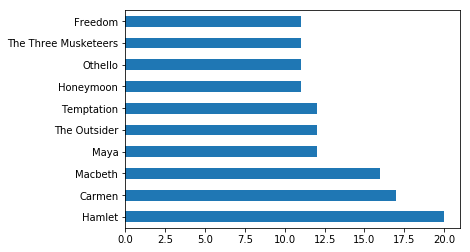

In [34]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [35]:
m_2000=(movies[movies.year>=2000])
m_2000['year'].value_counts()[:3]


2017    11474
2016     9440
2015     8702
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

Text(0.5,0,'Year')

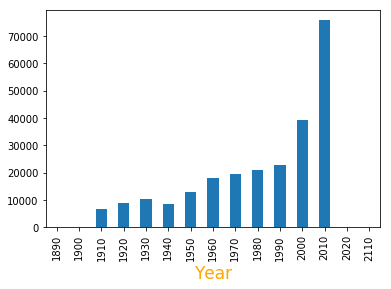

In [58]:
(movies.year//10*10).value_counts().sort_index().plot(kind='bar',x='year',y='films')
#plt.show()
plt.xlabel('Year', color = 'orange', fontsize='17', horizontalalignment='center')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [34]:
cast.character.value_counts()[:10]

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [35]:
(cast[cast.character.str.contains('Herself',case='False')][['name','character']].groupby('name').count()).sort_values(by = 'character')[-10:]

,character
name,
Caroline Kennedy,7
Queen Elizabeth the Queen Mother,7
Pat Nixon,8
Hillary Clinton,9
Luisa Horga,9
Mar?a Luisa (V) Mart?n,9
Margaret Thatcher,10
Joyce Brothers,10
Jacqueline Kennedy,12


In [36]:
#Who are the top 10 people most often credited as "Himself" in movie history?
(cast[cast.character.str.contains('Himself',case='False')][['name','character']].groupby('name').count()).sort_values(by = 'character')[-10:]

,character
name,
Bill Clinton,23
Franklin D. Roosevelt,25
Benito Mussolini,26
Martin Luther King,26
George W. Bush,28
Winston Churchill,28
Ronald Reagan,46
John F. Kennedy,49
Richard Nixon,54


### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [37]:
#(A) What are the top 10 most frequent roles that start with the word "Zombie"?
cast[cast.character.str.startswith('Zombie')][['name','character']].sort_values(by='character')[-10:]

,name,character
1764871,Jason Paz,Zombies and Insurgents
2387124,Casey William Walker,Zombies and Insurgents
1022752,Andrew Hook,Zombies and Insurgents
133209,Spencer Barber,Zombies and Insurgents
1049607,Kevin Huntington,Zombies and Insurgents
1499223,Clive McKenzie,"Zombies in a Shed"" - Segment)"
1499220,Clive McKenzie,"Zombies in a Shed"" - Segment)"
1665264,Jari Niskanen,Zombies' Hands
3769506,Ilekka Ylittie,Zombies' Hands
3147629,Kati K?ykka,Zombies' Hands


In [38]:
#(B) What are the top 10 most frequent roles that start with the word "Police"?
cast[cast.character.str.startswith('Police')][['name','character']].sort_values(by='character')[:10]

,name,character
829450,Mickey Gilbert,Police
692033,Francisco Extremera-L?pez,Police
1185818,Ari (II) Kettunen,Police
749866,Alessandro Fornari Turra,Police
1186317,Irwin Keyes,Police
2241340,H?ctor Tavares,Police
132996,Charles (VII) Barber,Police
558830,Vince Debecentvin,Police
343803,Fred Capulong,Police
293318,Bengt Brunskog,Police


### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

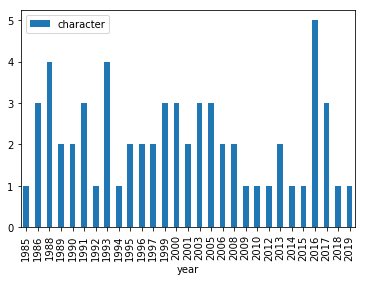

In [39]:
#cast_kr
kre = cast[cast.name.str.contains('Keanu Reeves',case = 'False')][['year','character']].groupby('year').count()
#cast_kr[cast_kr.year][['name','character']].groupby('year')
#kre1 = kre.groupby(['year'])
kre.plot(kind='bar')

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


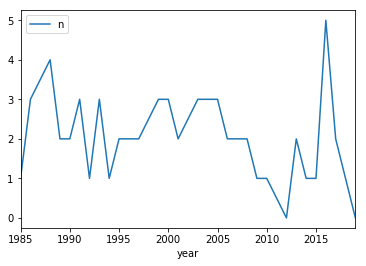

In [40]:
kre = cast[cast.name.str.contains('Keanu Reeves',case = 'False')][['year','n']].groupby('year').count()
kre.plot()

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

Text(0.5,0,'Year')

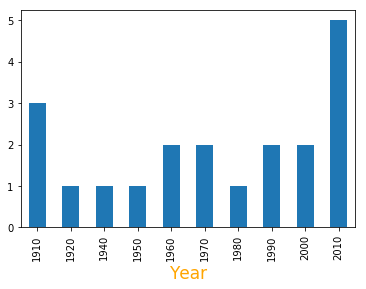

In [59]:
mv_hamlet = movies[(movies.title == 'Hamlet')]
(mv_hamlet.year//10*10).value_counts().sort_index().plot(kind='bar',x='year')
plt.xlabel('Year', color = 'orange', fontsize='17', horizontalalignment='center')

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [58]:
df1960 = cast[cast.year.between(1960,1969)]
X=1
dfset = df1960.groupby(["type","n"]).size().reset_index(name ="Lroles")
dfset1= dfset[dfset.Lroles > X].sort_values(by='type')
dfset1.Lroles.sum()


131292

In [59]:
df2000 = cast[cast.year.between(2000,2009)]
dfset20 = df2000.groupby(["type","n"]).size().reset_index(name ="Lroles")
dfset120= dfset20[dfset20.Lroles > X].sort_values(by='type')
dfset120.Lroles.sum()


497714

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [52]:
oz = cast[cast.name == 'Frank Oz']
oz_set = oz.groupby(["title", "year"]).size().reset_index(name="nroles")
oz_set[oz_set.nroles > 1].sort_values(by='year')


,title,year,nroles
24,The Muppet Movie,1979,8
0,An American Werewolf in London,1981,2
22,The Great Muppet Caper,1981,6
20,The Dark Crystal,1982,2
25,The Muppets Take Manhattan,1984,7
2,Follow That Bird,1985,3
23,The Muppet Christmas Carol,1992,7
7,Muppet Treasure Island,1996,4
8,Muppets from Space,1999,4
18,The Adventures of Elmo in Grouchland,1999,3


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [53]:
oz = cast[cast.name == 'Frank Oz']
oz_char = oz.groupby(["character"]).size().reset_index(name="portrayed")
oz_char[oz_char.portrayed > 2]


,character,portrayed
0,Animal,6
2,Bert,3
5,Cookie Monster,5
10,Fozzie Bear,4
18,Miss Piggy,6
25,Sam the Eagle,5
34,Yoda,6


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

Text(0.5,0,'Months')

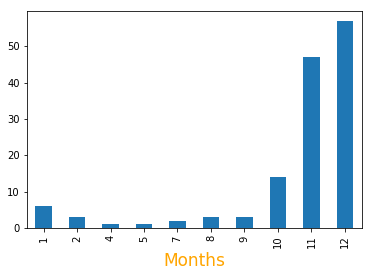

In [60]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Months', color = 'orange', fontsize='17', horizontalalignment='center')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

Text(0.5,0,'Month')

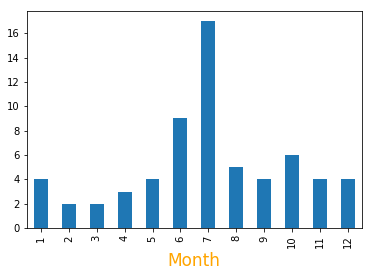

In [57]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month', color = 'orange', fontsize='17', horizontalalignment='center')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

Text(0.5,0,'Weeks')

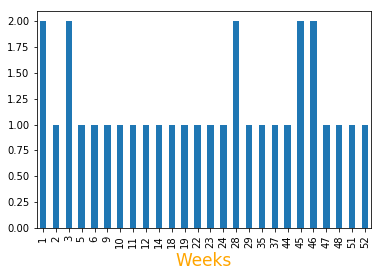

In [56]:
Action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
Action.date.dt.week.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Weeks', color = 'orange', fontsize='17', horizontalalignment='center')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [40]:
kr = cast[(cast.name == 'Keanu Reeves') & (cast.n == 1)]
us = release_dates[release_dates.country == 'USA']
merged_df = (kr.merge(us, how='inner', on=['title', 'year'])
      .sort_values('date'))
merged_df

,title,year,name,type,character,n,country,date
20,The Night Before,1988,Keanu Reeves,actor,Winston Connelly,1.0,USA,1988-04-15
3,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0,USA,1989-02-17
2,Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0,USA,1991-07-19
12,Little Buddha,1993,Keanu Reeves,actor,Siddhartha,1.0,USA,1994-05-25
13,Speed,1994,Keanu Reeves,actor,Jack Traven,1.0,USA,1994-06-10
10,Johnny Mnemonic,1995,Keanu Reeves,actor,Johnny Mnemonic,1.0,USA,1995-05-26
1,A Walk in the Clouds,1995,Keanu Reeves,actor,Paul Sutton,1.0,USA,1995-08-11
4,Chain Reaction,1996,Keanu Reeves,actor,Eddie Kasalivich,1.0,USA,1996-08-02
6,Feeling Minnesota,1996,Keanu Reeves,actor,Jjaks Clayton,1.0,USA,1996-09-13
17,The Devil's Advocate,1997,Keanu Reeves,actor,Kevin Lomax,1.0,USA,1997-10-17


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

Text(0.5,0,'Months')

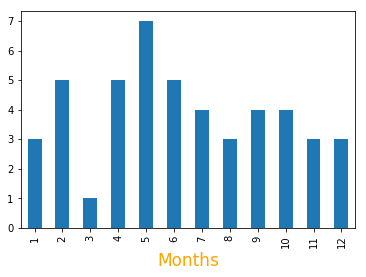

In [55]:
krm = cast[(cast.name == 'Keanu Reeves') ]
us = release_dates[release_dates.country == 'USA']
merged_df = (krm.merge(us, how='inner', on=['title', 'year'])
      .sort_values('date'))
merged_df.date.dt.month.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Months', color = 'orange', fontsize='17', horizontalalignment='center')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

Text(0.5,0,'Year')

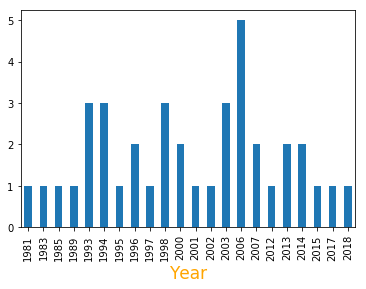

In [53]:
mk = cast[(cast.name == 'Ian McKellen') ]
us = release_dates[release_dates.country == 'USA']
merged_df = (mk.merge(us, how='inner', on=['title', 'year'])
      .sort_values('date'))
#merged_df
mdf = merged_df.date.dt.year.value_counts().sort_index()
mdf.plot(kind='bar')
plt.xlabel('Year', color = 'orange', fontsize='17', horizontalalignment='center')

#plt.show()